# Part 1
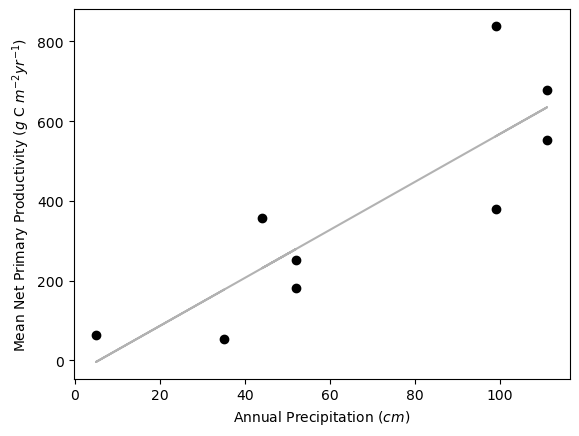\
**Fig. 1** Ca flux (left) and P flux (right) in relation to seasons and ecosystems. Seasonal sampling windows are grouped as NDJ (Nov, Dec, Jan), FMA (February, March, April), MJ (May, June), and JAS (Jul, Aug, Sep). Ecosystems are ordered in the legend by elevation, with Alpine being the highest elevation and Plain being the lowest elevation. Fluxes of both Ca and P seem to increase during later seasons (MJ and JAS). This can be demonstrated clearly by P flux in the foothills ecosystem, which shows an increase by about 7 times. However, in other cases this is shown to a lesser degree or a slight decrease in flux is demonstrated instead. Ca flux seems to decrease as elevation increases, while P flux seems to increase as elevation increases. This is demonstrated by the Ca flux where 3 of 4 seasons show a decrease in flux between the lowest and highest elevation ecosystems. The opposite is demonstrated by the P flux, where 3 of 4 seasons show an increase in flux between the lowest and highest elevation ecosystems. In both cases, relationships between flux across seasons and ecosystems are not well defined. This may largely be due to a lack of data for some ecosystems during earlier seasons, particularly NDJ and FMA.

| Regression Variable | R squared |
| ------------------- | --------- |
| Annual Precipitation (cm) | 0.721851 |
| Mean Annual Temperature (C) | 0.254830 |
| Ratio of Foliar Carbon to Nitrogen | 0.149004 |

# Part 2
$flux_{in} = 23.189 mg$ $m^{-2}$ $yr^{-1}*10km^2 = 23189 g$ $km^{-2}$ $yr^{-1}*10km^2 = 231890 g$ $yr^{-1} =231.890 kg$ $yr^{-1} $

$flux_{out} = 0.1 kg$ $ha^{-2}*10km^2 = 0.1 kg$ $ha^{-2}*1000ha = 100 kg$ $yr^{-1} $

$flux_{net} = flux_{in}-flux_{out}=231.890 kg$ $yr^{-1} -100 kg$ $yr^{-1} =131.89kg$ $yr^{-1}$

The net change in watershed P is **131.89 kg/yr**.

The watershed P budget indicates that the overall mass of phosphorus in the watershed can be expected to increase over a year. This increase in P may cause an increase in plant biomass across the ecosystem since phosphorus is an important nutrient for plant growth. This calculation integrates across spheres such as the lithosphere, atmosphere, and hydrosphere. The lithosphere relates to the watershed area, which is the land surface over which the calculation is performed. The atmosphere transports and deposits P in the form of dust to the watershed area. Finally, the hydrosphere is represented by the export of P by a stream. This calculation uses a systems based approach by defining the boundaries of the system (the watershed area) and identify how P is entering and leaving this area. Outputs from the system are subtracted from inputs to the system to determine the net amount of P that is being added to the system storage. 

# Code for Generating Figures

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [17]:
# Read in data
df = pd.read_csv('Ecosystem_NPP.csv')
df

,Site,Vegetation,MeanNPPobs_gCm−2yr−1,Precipitation_cm,MAT_C,C:N
0,Mid-west Agricultrual,Corn,839,99,11.23,10
1,Mid-west Agricultrual,Soybean,379,99,11.23,11
2,Temperate Forest,Deciduous Forest,679,111,8.31,24
3,Temperate Forest,Conifer Forest,552,111,8.31,37
4,Temperate Conifer,Conifer Forest,356,44,7.75,40
5,Boreal Forest,Upland Black Spruce,251,52,-3.20,60
6,Boreal Forest,Open Black Spruce,181,52,-3.20,50
7,Arctic Plain,Grassland,64,5,-10.91,25
8,Desert grassland,Grassland,54,35,13.57,24


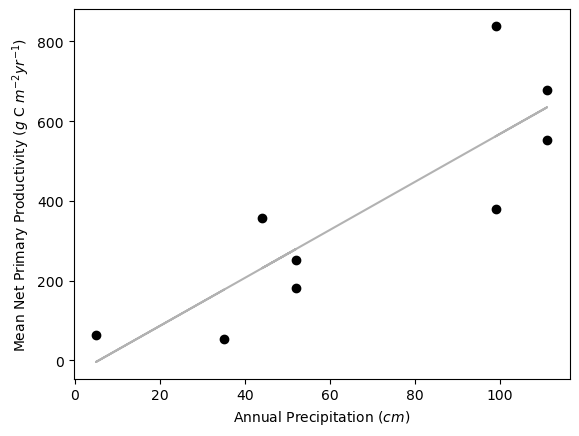

r2 = 0.721851


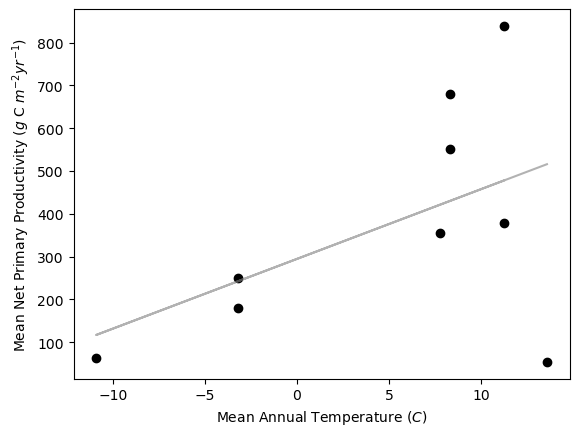

r2 = 0.254830


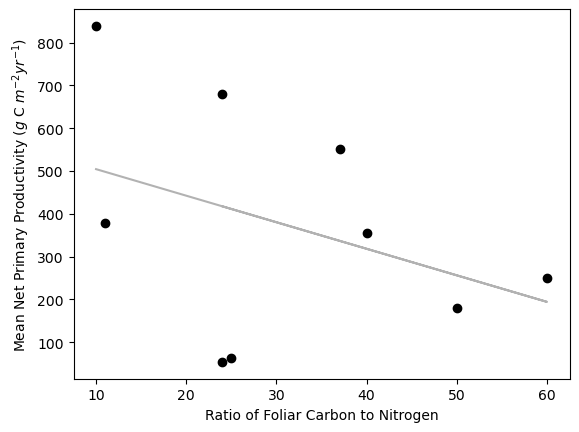

r2 = 0.149004


In [70]:
NPP_col = 'MeanNPPobs_gCm−2yr−1'

best_coef = 0;
best_intcpt = 0;
best_r2 = 0;
best_var = '';
target_col = ('Precipitation_cm','MAT_C','C:N ')
y_label = 'Mean Net Primary Productivity ($g$ C $m^{-2} yr^{-1}$)'
x_labels = ('Annual Precipitation ($cm$)', 'Mean Annual Temperature ($C$)', 'Ratio of Foliar Carbon to Nitrogen')

i = 0
for col in target_col:
    model = LinearRegression()
    x=df[col].values.reshape(-1,1) # Convert to numpy and reshape into different dimension
    y=df[NPP_col].values.reshape(-1,1)
    model.fit(x,y)

    y_model = model.predict(x)

    plt.scatter(x,y,color='black')
    plt.plot(x,y_model,color='grey',alpha=0.6)
    plt.xlabel(x_labels[i])
    plt.ylabel(y_label)
    plt.show()
    r2 = model.score(x,y)
    print('r2 = %f' % (r2))
    if r2 > best_r2:
        best_r2=r2
        best_coef = model.coef_
        best_intcpt = model.intercept_
        best_var = col

    i+=1

In [55]:
# Function for best fitting regression.
# NPP [C]g m^-2 y^-1
def reg_func(x):
    return best_coef*x+best_intcpt

In [69]:
best_var

'Precipitation_cm'

In [59]:
land_area = 400 * 10**6 #km^2 converted to m^2
years = 10
mean_precip = 65 # Best fit was determined to be precip model
reg_func(mean_precip) * land_area * years * 10 **-12 # teragrams of carbon


array([[1.42949383]])